In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 833.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 522.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00
   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rand_state = 1000

In [ ]:
df = pd.read_csv("bikeshare.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
df.isna().sum() /len(df)

,0
season,0.0
yr,0.0
mnth,0.0
hr,0.0
holiday,0.0
weekday,0.0
notbizday,0.0
weathersit,0.0
temp,0.0
hum,0.0


# 1-Define Variables & Drop Dteday

Defining the variables and dropping dteday - ask about this


In [ ]:
df = df.drop('dteday', axis=1)

# Define features and target
X = df.drop('cnt', axis=1)
y = df['cnt']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [ ]:
X_train.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed
2136,2,0,4,21,0,0,1,2,-0.399817,-0.970450,0.276298
5466,3,0,8,16,0,6,1,1,1.573634,-0.866786,0.031898
8770,1,1,1,6,0,5,0,2,-1.438475,0.532687,-0.699669
14674,3,1,9,15,0,6,1,3,0.327244,1.310171,0.519881
15708,4,1,10,17,0,0,1,1,0.119512,-1.229612,0.519881


In [ ]:
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_scaled.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed
0,-0.449921,-0.999209,-0.735114,1.363219,-0.172777,-1.498166,1.468396,0.898589,-0.400145,-0.965729,0.270191
1,0.453626,-0.999209,0.428100,0.639806,-0.172777,1.492716,1.468396,-0.663827,1.569686,-0.862217,0.026880
2,-1.353469,1.000792,-1.607524,-0.807019,-0.172777,0.994236,-0.681015,0.898589,-1.436898,0.535206,-0.701423
3,0.453626,1.000792,0.718903,0.495124,-0.172777,1.492716,1.468396,2.461005,0.325582,1.311551,0.512687
4,1.357173,1.000792,1.009707,0.784489,-0.172777,-1.498166,1.468396,-0.663827,0.118231,-1.224511,0.512687


# 2-KNN Regression

2.1 + 2.2 Default parameters and predictions

In [ ]:
# 2.1 Train the model with default parameters
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

# 2.2 Make predictions
y_hat = knn.predict(X_test_scaled)



2.3 + 2.4 + 2.5

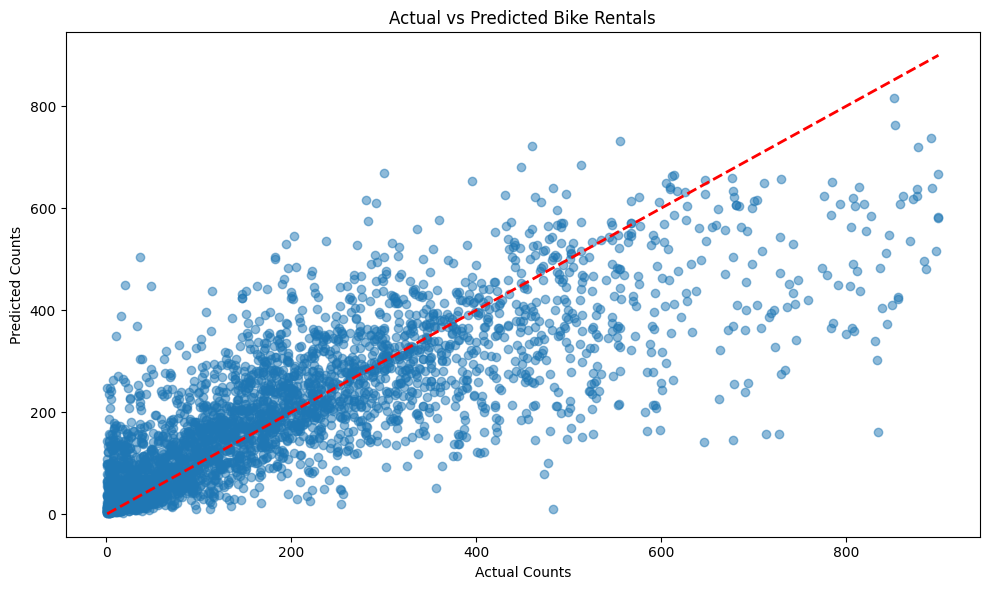

RMSE on test set: 108.24


In [ ]:
# 2.3 Create predictions dataframe
df_predictions = pd.DataFrame({
    'y_test': y_test,
    'y_hat': y_hat
})

# 2.4 Visualization of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Counts')
plt.ylabel('Predicted Counts')
plt.title('Actual vs Predicted Bike Rentals')
plt.tight_layout()
plt.show()

# 2.5 Calculate RMSE for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat))
print(f'RMSE on test set: {rmse_test:.2f}')

2.4 Our KNN Regression looks like it is performing mediocrely. It has a high bias and on average, it does a somewhat decent job at catching the true unobserved relationship (when the count is closer to zero) but, as the count gets larger, the worse the model does. The model, in summary, is underperforming and doess not look like it is doing a great job.


#3-Cross validation

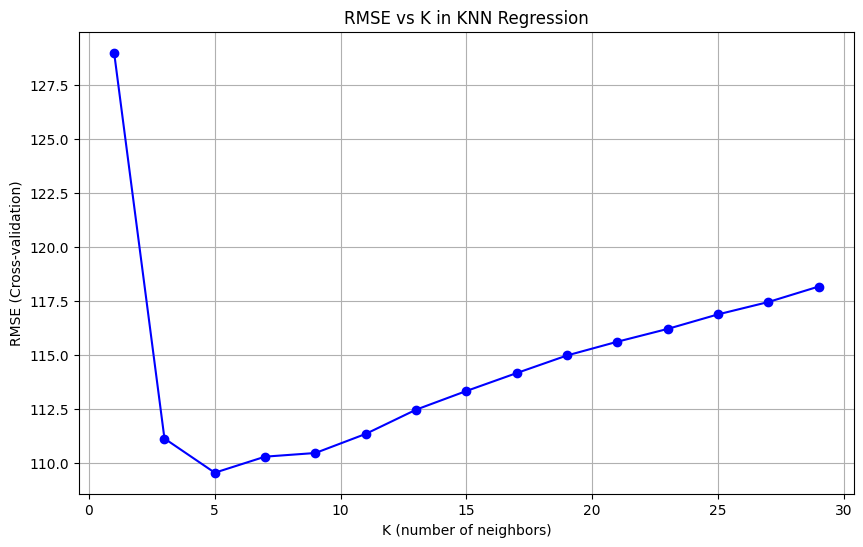

Optimal K: 5


In [ ]:
#3.1
#Cross-validation
def cv_rmse_knn(k, X, y):
    knn = KNeighborsRegressor(n_neighbors=k)
    mse = cross_val_score(knn, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(-mse)
    return rmse.mean()

# Find optimal K
k_values = np.arange(1, 31, 2)
rmse_cv = [cv_rmse_knn(k, X_train_scaled, y_train) for k in k_values]

#3.2
#Plot RMSE vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_cv, 'bo-')
plt.xlabel('K (number of neighbors)')
plt.ylabel('RMSE (Cross-validation)')
plt.title('RMSE vs K in KNN Regression')
plt.grid(True)
plt.show()

# Find optimal K
optimal_k = k_values[np.argmin(rmse_cv)]
print(f'Optimal K: {optimal_k}')

# Final model with optimal K
optimal_knn = KNeighborsRegressor(n_neighbors=optimal_k)
optimal_knn.fit(X_train_scaled, y_train)
y_hat_optimal = optimal_knn.predict(X_test_scaled)

#4-R-squared

R-squared (KNN with optimal K): 0.6582
R-squared (Multiple Linear Regression): 0.4004

Model Comparison:
-----------------
KNN R-squared:     0.6582
MLR R-squared:     0.4004

Better model: KNN
Difference in R-squared: 0.2578


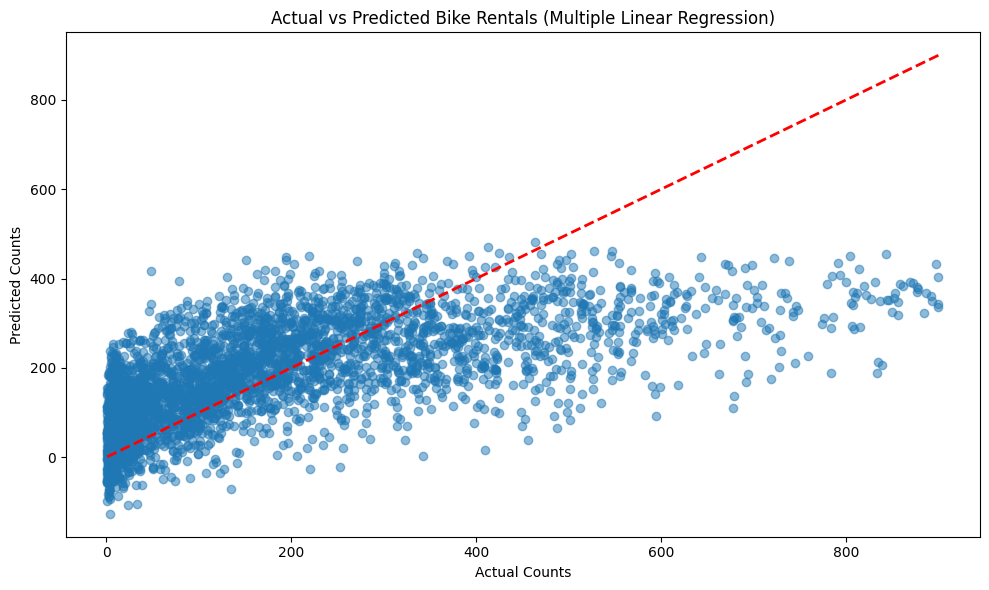

In [ ]:
# Calculate R-squared for KNN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_knn = r2_score(y_test, y_hat_optimal)
print(f'R-squared (KNN with optimal K): {r2_knn:.4f}')

# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)
y_hat_mlr = mlr.predict(X_test_scaled)

r2_mlr = r2_score(y_test, y_hat_mlr)
print(f'R-squared (Multiple Linear Regression): {r2_mlr:.4f}')

# Compare model performances
print("\nModel Comparison:")
print("-----------------")
print(f"KNN R-squared:     {r2_knn:.4f}")
print(f"MLR R-squared:     {r2_mlr:.4f}")
print(f"\nBetter model: {'KNN' if r2_knn > r2_mlr else 'Multiple Linear Regression'}")
print(f"Difference in R-squared: {abs(r2_knn - r2_mlr):.4f}")

# Visualize MLR predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_mlr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Counts')
plt.ylabel('Predicted Counts')
plt.title('Actual vs Predicted Bike Rentals (Multiple Linear Regression)')
plt.tight_layout()
plt.show()

The KNN Regression Model for optimal value of K is performing better in the test set. We want to choose the model that has the highest R^2 value (and lowest RMSE value). KNN Regression with optimal K is performing at 65%, AKA our model can predict 65.8% of changes in our target variable, which isn't great, but it is better than 40% (Multiple Linear Regression)